# Recomendation System for travel destinations

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [2]:
path = './flights.csv'
df_flights=pd.read_csv(path)
df_flights

travelCode  userCode                 from                   to  \
0                0         0          Recife (PE)   Florianopolis (SC)   
1                0         0   Florianopolis (SC)          Recife (PE)   
2                1         0        Brasilia (DF)   Florianopolis (SC)   
3                1         0   Florianopolis (SC)        Brasilia (DF)   
4                2         0         Aracaju (SE)        Salvador (BH)   
...            ...       ...                  ...                  ...   
271883      135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884      135942      1339   Florianopolis (SC)           Natal (RN)   
271885      135942      1339           Natal (RN)   Florianopolis (SC)   
271886      135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887      135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType    price  time  distance       agency        date  
0       firstClass  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1       firstClass  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2       firstClass  1487.52  1.66    637.56      CloudFy  10/03/2019  
3       firstClass  1127.36  1.66    637.56      CloudFy  10/04/2019  
4       firstClass  1684.05  2.16    830.86      CloudFy  10/10/2019  
...            ...      ...   ...       ...          ...         ...  
271883  firstClass  1446.34  1.49    573.81      CloudFy  07/12/2020  
271884    economic   726.95  1.84    709.37      CloudFy  07/16/2020  
271885    economic   873.07  1.84    709.37      CloudFy  07/20/2020  
271886    economic   313.62  1.21    466.30      CloudFy  07/23/2020  
271887    economic   533.69  1.21    466.30      CloudFy  07/26/2020  

[271888 rows x 10 columns]

In [3]:
def Data_EDA(df):
    return(df.head(), df.describe(), df.columns, df.dtypes, df.isnull().sum())

In [4]:
Data_EDA(df_flights)

(   travelCode  userCode                from                  to  flightType  \
 0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
 1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
 2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
 3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
 4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   
 
      price  time  distance       agency        date  
 0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
 1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
 2  1487.52  1.66    637.56      CloudFy  10/03/2019  
 3  1127.36  1.66    637.56      CloudFy  10/04/2019  
 4  1684.05  2.16    830.86      CloudFy  10/10/2019  ,
           travelCode       userCode         price           time  \
 count  271888.000000  271888.000000  271888.00000  271888.000000   
 mean    67971.500000     667.505495     957.3750

In [5]:
df_flights=df_flights.rename(columns = {'travelCode': 'flight_code','price':'price_flight', 'date':'date_flight'})
df_flights

flight_code  userCode                 from                   to  \
0                 0         0          Recife (PE)   Florianopolis (SC)   
1                 0         0   Florianopolis (SC)          Recife (PE)   
2                 1         0        Brasilia (DF)   Florianopolis (SC)   
3                 1         0   Florianopolis (SC)        Brasilia (DF)   
4                 2         0         Aracaju (SE)        Salvador (BH)   
...             ...       ...                  ...                  ...   
271883       135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884       135942      1339   Florianopolis (SC)           Natal (RN)   
271885       135942      1339           Natal (RN)   Florianopolis (SC)   
271886       135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887       135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType  price_flight  time  distance       agency date_flight  
0       firstClass       1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1       firstClass       1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2       firstClass       1487.52  1.66    637.56      CloudFy  10/03/2019  
3       firstClass       1127.36  1.66    637.56      CloudFy  10/04/2019  
4       firstClass       1684.05  2.16    830.86      CloudFy  10/10/2019  
...            ...           ...   ...       ...          ...         ...  
271883  firstClass       1446.34  1.49    573.81      CloudFy  07/12/2020  
271884    economic        726.95  1.84    709.37      CloudFy  07/16/2020  
271885    economic        873.07  1.84    709.37      CloudFy  07/20/2020  
271886    economic        313.62  1.21    466.30      CloudFy  07/23/2020  
271887    economic        533.69  1.21    466.30      CloudFy  07/26/2020  

[271888 rows x 10 columns]

In [6]:
flights = df_flights.drop([ 'time', 'distance', 'agency'], axis=1)
flights

flight_code  userCode                 from                   to  \
0                 0         0          Recife (PE)   Florianopolis (SC)   
1                 0         0   Florianopolis (SC)          Recife (PE)   
2                 1         0        Brasilia (DF)   Florianopolis (SC)   
3                 1         0   Florianopolis (SC)        Brasilia (DF)   
4                 2         0         Aracaju (SE)        Salvador (BH)   
...             ...       ...                  ...                  ...   
271883       135941      1339    Campo Grande (MS)   Florianopolis (SC)   
271884       135942      1339   Florianopolis (SC)           Natal (RN)   
271885       135942      1339           Natal (RN)   Florianopolis (SC)   
271886       135943      1339   Florianopolis (SC)  Rio de Janeiro (RJ)   
271887       135943      1339  Rio de Janeiro (RJ)   Florianopolis (SC)   

        flightType  price_flight date_flight  
0       firstClass       1434.38  09/26/2019  
1       firstClass       1292.29  09/30/2019  
2       firstClass       1487.52  10/03/2019  
3       firstClass       1127.36  10/04/2019  
4       firstClass       1684.05  10/10/2019  
...            ...           ...         ...  
271883  firstClass       1446.34  07/12/2020  
271884    economic        726.95  07/16/2020  
271885    economic        873.07  07/20/2020  
271886    economic        313.62  07/23/2020  
271887    economic        533.69  07/26/2020  

[271888 rows x 7 columns]

In [7]:
path_hotels = './hotels.csv'
df_hotels = pd.read_csv(path_hotels)
df_hotels

travelCode  userCode      name               place  days   price  \
0               0         0   Hotel A  Florianopolis (SC)     4  313.02   
1               2         0   Hotel K       Salvador (BH)     2  263.41   
2               7         0   Hotel K       Salvador (BH)     3  263.41   
3              11         0   Hotel K       Salvador (BH)     4  263.41   
4              13         0   Hotel A  Florianopolis (SC)     1  313.02   
...           ...       ...       ...                 ...   ...     ...   
40547      135938      1339  Hotel BP       Brasilia (DF)     3  247.62   
40548      135939      1339  Hotel BP       Brasilia (DF)     1  247.62   
40549      135940      1339  Hotel BW   Campo Grande (MS)     3   60.39   
40550      135941      1339  Hotel BW   Campo Grande (MS)     3   60.39   
40551      135942      1339  Hotel BD          Natal (RN)     4  242.88   

         total        date  
0      1252.08  09/26/2019  
1       526.82  10/10/2019  
2       790.23  11/14/2019  
3      1053.64  12/12/2019  
4       313.02  12/26/2019  
...        ...         ...  
40547   742.86  06/18/2020  
40548   247.62  06/25/2020  
40549   181.17  07/02/2020  
40550   181.17  07/09/2020  
40551   971.52  07/16/2020  

[40552 rows x 8 columns]

In [8]:
Data_EDA(df_hotels)

(   travelCode  userCode     name               place  days   price    total  \
 0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
 1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
 2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
 3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
 4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   
 
          date  
 0  09/26/2019  
 1  10/10/2019  
 2  11/14/2019  
 3  12/12/2019  
 4  12/26/2019  ,
           travelCode      userCode          days         price         total
 count   40552.000000  40552.000000  40552.000000  40552.000000  40552.000000
 mean    67911.794461    666.963726      2.499679    214.439554    536.229513
 std     39408.199333    391.136794      1.119326     76.742305    319.331482
 min         0.000000      0.000000      1.000000     60.390000     60.390000
 25%     33696.750000    

In [9]:
df_hotels = df_hotels.rename(columns ={'price':'price_hotel_x_day', 'total':'total_hotel', 'date':'date_hotels'})
df_hotels

travelCode  userCode      name               place  days  \
0               0         0   Hotel A  Florianopolis (SC)     4   
1               2         0   Hotel K       Salvador (BH)     2   
2               7         0   Hotel K       Salvador (BH)     3   
3              11         0   Hotel K       Salvador (BH)     4   
4              13         0   Hotel A  Florianopolis (SC)     1   
...           ...       ...       ...                 ...   ...   
40547      135938      1339  Hotel BP       Brasilia (DF)     3   
40548      135939      1339  Hotel BP       Brasilia (DF)     1   
40549      135940      1339  Hotel BW   Campo Grande (MS)     3   
40550      135941      1339  Hotel BW   Campo Grande (MS)     3   
40551      135942      1339  Hotel BD          Natal (RN)     4   

       price_hotel_x_day  total_hotel date_hotels  
0                 313.02      1252.08  09/26/2019  
1                 263.41       526.82  10/10/2019  
2                 263.41       790.23  11/14/2019  
3                 263.41      1053.64  12/12/2019  
4                 313.02       313.02  12/26/2019  
...                  ...          ...         ...  
40547             247.62       742.86  06/18/2020  
40548             247.62       247.62  06/25/2020  
40549              60.39       181.17  07/02/2020  
40550              60.39       181.17  07/09/2020  
40551             242.88       971.52  07/16/2020  

[40552 rows x 8 columns]

In [10]:
hotels = df_hotels.drop([ 'name', 'total_hotel', 'date_hotels'], axis=1)
hotels

travelCode  userCode               place  days  price_hotel_x_day
0               0         0  Florianopolis (SC)     4             313.02
1               2         0       Salvador (BH)     2             263.41
2               7         0       Salvador (BH)     3             263.41
3              11         0       Salvador (BH)     4             263.41
4              13         0  Florianopolis (SC)     1             313.02
...           ...       ...                 ...   ...                ...
40547      135938      1339       Brasilia (DF)     3             247.62
40548      135939      1339       Brasilia (DF)     1             247.62
40549      135940      1339   Campo Grande (MS)     3              60.39
40550      135941      1339   Campo Grande (MS)     3              60.39
40551      135942      1339          Natal (RN)     4             242.88

[40552 rows x 5 columns]

In [11]:
path_users = './users.csv'
df_users = pd.read_csv(path_users)
df_users

code        company              name  gender  age
0        0           4You         Roy Braun    male   21
1        1           4You    Joseph Holsten    male   37
2        2           4You     Wilma Mcinnis  female   48
3        3           4You      Paula Daniel  female   23
4        4           4You   Patricia Carson  female   44
...    ...            ...               ...     ...  ...
1335  1335  Umbrella LTDA  Albert Garroutte    male   23
1336  1336  Umbrella LTDA        Kim Shores  female   40
1337  1337  Umbrella LTDA     James Gimenez    male   28
1338  1338  Umbrella LTDA      Viola Agosta  female   52
1339  1339  Umbrella LTDA    Paul Rodriguez    male   35

[1340 rows x 5 columns]

In [12]:
df_users = df_users.rename(columns={'code':'userCode'})
df_users

userCode        company              name  gender  age
0            0           4You         Roy Braun    male   21
1            1           4You    Joseph Holsten    male   37
2            2           4You     Wilma Mcinnis  female   48
3            3           4You      Paula Daniel  female   23
4            4           4You   Patricia Carson  female   44
...        ...            ...               ...     ...  ...
1335      1335  Umbrella LTDA  Albert Garroutte    male   23
1336      1336  Umbrella LTDA        Kim Shores  female   40
1337      1337  Umbrella LTDA     James Gimenez    male   28
1338      1338  Umbrella LTDA      Viola Agosta  female   52
1339      1339  Umbrella LTDA    Paul Rodriguez    male   35

[1340 rows x 5 columns]

In [13]:
Data_EDA(df_users)

(   userCode company             name  gender  age
 0         0    4You        Roy Braun    male   21
 1         1    4You   Joseph Holsten    male   37
 2         2    4You    Wilma Mcinnis  female   48
 3         3    4You     Paula Daniel  female   23
 4         4    4You  Patricia Carson  female   44,
           userCode          age
 count  1340.000000  1340.000000
 mean    669.500000    42.742537
 std     386.968991    12.869779
 min       0.000000    21.000000
 25%     334.750000    32.000000
 50%     669.500000    42.000000
 75%    1004.250000    54.000000
 max    1339.000000    65.000000,
 Index(['userCode', 'company', 'name', 'gender', 'age'], dtype='object'),
 userCode     int64
 company     object
 name        object
 gender      object
 age          int64
 dtype: object,
 userCode    0
 company     0
 name        0
 gender      0
 age         0
 dtype: int64)

In [14]:
users = df_users.drop(['name', 'company'], axis=1)
users

userCode  gender  age
0            0    male   21
1            1    male   37
2            2  female   48
3            3  female   23
4            4  female   44
...        ...     ...  ...
1335      1335    male   23
1336      1336  female   40
1337      1337    male   28
1338      1338  female   52
1339      1339    male   35

[1340 rows x 3 columns]

In [15]:
df_half_total = flights.merge(hotels, how='inner', left_on=['userCode', 'flight_code'], right_on=['userCode', 'travelCode'])
df_half_total

flight_code  userCode                from                  to  \
0                0         0         Recife (PE)  Florianopolis (SC)   
1                0         0  Florianopolis (SC)         Recife (PE)   
2                2         0        Aracaju (SE)       Salvador (BH)   
3                2         0       Salvador (BH)        Aracaju (SE)   
4                7         0        Aracaju (SE)       Salvador (BH)   
...            ...       ...                 ...                 ...   
81099       135940      1339   Campo Grande (MS)  Florianopolis (SC)   
81100       135941      1339  Florianopolis (SC)   Campo Grande (MS)   
81101       135941      1339   Campo Grande (MS)  Florianopolis (SC)   
81102       135942      1339  Florianopolis (SC)          Natal (RN)   
81103       135942      1339          Natal (RN)  Florianopolis (SC)   

       flightType  price_flight date_flight  travelCode               place  \
0      firstClass       1434.38  09/26/2019           0  Florianopolis (SC)   
1      firstClass       1292.29  09/30/2019           0  Florianopolis (SC)   
2      firstClass       1684.05  10/10/2019           2       Salvador (BH)   
3      firstClass       1531.92  10/12/2019           2       Salvador (BH)   
4        economic        964.83  11/14/2019           7       Salvador (BH)   
...           ...           ...         ...         ...                 ...   
81099  firstClass       1341.21  07/05/2020      135940   Campo Grande (MS)   
81100  firstClass        949.58  07/09/2020      135941   Campo Grande (MS)   
81101  firstClass       1446.34  07/12/2020      135941   Campo Grande (MS)   
81102    economic        726.95  07/16/2020      135942          Natal (RN)   
81103    economic        873.07  07/20/2020      135942          Natal (RN)   

       days  price_hotel_x_day  
0         4             313.02  
1         4             313.02  
2         2             263.41  
3         2             263.41  
4         3             263.41  
...     ...                ...  
81099     3              60.39  
81100     3              60.39  
81101     3              60.39  
81102     4             242.88  
81103     4             242.88  

[81104 rows x 11 columns]

In [16]:
df_total = df_half_total.merge(users, how='inner', on= 'userCode')
df_total

flight_code  userCode                from                  to  \
0                0         0         Recife (PE)  Florianopolis (SC)   
1                0         0  Florianopolis (SC)         Recife (PE)   
2                2         0        Aracaju (SE)       Salvador (BH)   
3                2         0       Salvador (BH)        Aracaju (SE)   
4                7         0        Aracaju (SE)       Salvador (BH)   
...            ...       ...                 ...                 ...   
81099       135940      1339   Campo Grande (MS)  Florianopolis (SC)   
81100       135941      1339  Florianopolis (SC)   Campo Grande (MS)   
81101       135941      1339   Campo Grande (MS)  Florianopolis (SC)   
81102       135942      1339  Florianopolis (SC)          Natal (RN)   
81103       135942      1339          Natal (RN)  Florianopolis (SC)   

       flightType  price_flight date_flight  travelCode               place  \
0      firstClass       1434.38  09/26/2019           0  Florianopolis (SC)   
1      firstClass       1292.29  09/30/2019           0  Florianopolis (SC)   
2      firstClass       1684.05  10/10/2019           2       Salvador (BH)   
3      firstClass       1531.92  10/12/2019           2       Salvador (BH)   
4        economic        964.83  11/14/2019           7       Salvador (BH)   
...           ...           ...         ...         ...                 ...   
81099  firstClass       1341.21  07/05/2020      135940   Campo Grande (MS)   
81100  firstClass        949.58  07/09/2020      135941   Campo Grande (MS)   
81101  firstClass       1446.34  07/12/2020      135941   Campo Grande (MS)   
81102    economic        726.95  07/16/2020      135942          Natal (RN)   
81103    economic        873.07  07/20/2020      135942          Natal (RN)   

       days  price_hotel_x_day gender  age  
0         4             313.02   male   21  
1         4             313.02   male   21  
2         2             263.41   male   21  
3         2             263.41   male   21  
4         3             263.41   male   21  
...     ...                ...    ...  ...  
81099     3              60.39   male   35  
81100     3              60.39   male   35  
81101     3              60.39   male   35  
81102     4             242.88   male   35  
81103     4             242.88   male   35  

[81104 rows x 13 columns]

In [17]:
df_recommendation = df_total
df_recommendation

flight_code  userCode                from                  to  \
0                0         0         Recife (PE)  Florianopolis (SC)   
1                0         0  Florianopolis (SC)         Recife (PE)   
2                2         0        Aracaju (SE)       Salvador (BH)   
3                2         0       Salvador (BH)        Aracaju (SE)   
4                7         0        Aracaju (SE)       Salvador (BH)   
...            ...       ...                 ...                 ...   
81099       135940      1339   Campo Grande (MS)  Florianopolis (SC)   
81100       135941      1339  Florianopolis (SC)   Campo Grande (MS)   
81101       135941      1339   Campo Grande (MS)  Florianopolis (SC)   
81102       135942      1339  Florianopolis (SC)          Natal (RN)   
81103       135942      1339          Natal (RN)  Florianopolis (SC)   

       flightType  price_flight date_flight  travelCode               place  \
0      firstClass       1434.38  09/26/2019           0  Florianopolis (SC)   
1      firstClass       1292.29  09/30/2019           0  Florianopolis (SC)   
2      firstClass       1684.05  10/10/2019           2       Salvador (BH)   
3      firstClass       1531.92  10/12/2019           2       Salvador (BH)   
4        economic        964.83  11/14/2019           7       Salvador (BH)   
...           ...           ...         ...         ...                 ...   
81099  firstClass       1341.21  07/05/2020      135940   Campo Grande (MS)   
81100  firstClass        949.58  07/09/2020      135941   Campo Grande (MS)   
81101  firstClass       1446.34  07/12/2020      135941   Campo Grande (MS)   
81102    economic        726.95  07/16/2020      135942          Natal (RN)   
81103    economic        873.07  07/20/2020      135942          Natal (RN)   

       days  price_hotel_x_day gender  age  
0         4             313.02   male   21  
1         4             313.02   male   21  
2         2             263.41   male   21  
3         2             263.41   male   21  
4         3             263.41   male   21  
...     ...                ...    ...  ...  
81099     3              60.39   male   35  
81100     3              60.39   male   35  
81101     3              60.39   male   35  
81102     4             242.88   male   35  
81103     4             242.88   male   35  

[81104 rows x 13 columns]

In [18]:
df_recommendation['to'].value_counts()

Florianopolis (SC)     17224
Aracaju (SE)           11056
Campo Grande (MS)      10271
Brasilia (DF)           9228
Recife (PE)             9079
Sao Paulo (SP)          7070
Natal (RN)              7053
Salvador (BH)           5094
Rio de Janeiro (RJ)     5029
Name: to, dtype: int64

# User Input recomendation system

1) The recommendation system aspires to suggest travel destinations based on user characteristics. The data that are required are seuenti:
- Where the user wants to start from
- What class of ticket they wants
- The price the user is willing to pay for the flight and hotel
- How many days the user wants to stay and in what month the user wants to travel
- Age
- Gender 

In [39]:
import json
from pandas import json_normalize

user_input = '''
{
"Information":
 [{"from": "Rio de Janeiro (RJ)", "fligthType": "economic", "price_flight" : 300, "days": 5, "price_hotel_x_day": 80, "gender": "male", "age": 25,  "month": 9}],
 "status": ["ok"]
}
'''
print(user_input)


{
"Information":
 [{"from": "Rio de Janeiro (RJ)", "fligthType": "economic", "price_flight" : 300, "days": 5, "price_hotel_x_day": 80, "gender": "male", "age": 25,  "month": 9}],
 "status": ["ok"]
}



In [40]:
dict = json.loads(user_input)
user_input_df = json_normalize(dict['Information'])
user_input_df

from fligthType  price_flight  days  price_hotel_x_day  \
0  Rio de Janeiro (RJ)   economic           300     5                 80   

  gender  age  month  
0   male   25      9

In [41]:
df_recommendation

flight_code  userCode                from                  to  \
0                0         0         Recife (PE)  Florianopolis (SC)   
1                0         0  Florianopolis (SC)         Recife (PE)   
2                2         0        Aracaju (SE)       Salvador (BH)   
3                2         0       Salvador (BH)        Aracaju (SE)   
4                7         0        Aracaju (SE)       Salvador (BH)   
...            ...       ...                 ...                 ...   
81099       135940      1339   Campo Grande (MS)  Florianopolis (SC)   
81100       135941      1339  Florianopolis (SC)   Campo Grande (MS)   
81101       135941      1339   Campo Grande (MS)  Florianopolis (SC)   
81102       135942      1339  Florianopolis (SC)          Natal (RN)   
81103       135942      1339          Natal (RN)  Florianopolis (SC)   

       flightType  price_flight date_flight  travelCode               place  \
0      firstClass       1434.38  09/26/2019           0  Florianopolis (SC)   
1      firstClass       1292.29  09/30/2019           0  Florianopolis (SC)   
2      firstClass       1684.05  10/10/2019           2       Salvador (BH)   
3      firstClass       1531.92  10/12/2019           2       Salvador (BH)   
4        economic        964.83  11/14/2019           7       Salvador (BH)   
...           ...           ...         ...         ...                 ...   
81099  firstClass       1341.21  07/05/2020      135940   Campo Grande (MS)   
81100  firstClass        949.58  07/09/2020      135941   Campo Grande (MS)   
81101  firstClass       1446.34  07/12/2020      135941   Campo Grande (MS)   
81102    economic        726.95  07/16/2020      135942          Natal (RN)   
81103    economic        873.07  07/20/2020      135942          Natal (RN)   

       days  price_hotel_x_day gender  age  
0         4             313.02   male   21  
1         4             313.02   male   21  
2         2             263.41   male   21  
3         2             263.41   male   21  
4         3             263.41   male   21  
...     ...                ...    ...  ...  
81099     3              60.39   male   35  
81100     3              60.39   male   35  
81101     3              60.39   male   35  
81102     4             242.88   male   35  
81103     4             242.88   male   35  

[81104 rows x 13 columns]

In [42]:
destinations_df = pd.DataFrame()
destinations_df = df_total['to']
destinations_df

0        Florianopolis (SC)
1               Recife (PE)
2             Salvador (BH)
3              Aracaju (SE)
4             Salvador (BH)
                ...        
81099    Florianopolis (SC)
81100     Campo Grande (MS)
81101    Florianopolis (SC)
81102            Natal (RN)
81103    Florianopolis (SC)
Name: to, Length: 81104, dtype: object

In [43]:
df_recommendation['month'] = pd.DatetimeIndex(df_recommendation['date_flight']).month
df_recommendation = df_recommendation.drop(['userCode', 'flight_code', 'to', 'date_flight', 'place', 'travelCode'], axis=1)

In [44]:
df_recommendation

from  flightType  price_flight  days  price_hotel_x_day  \
0             Recife (PE)  firstClass       1434.38     4             313.02   
1      Florianopolis (SC)  firstClass       1292.29     4             313.02   
2            Aracaju (SE)  firstClass       1684.05     2             263.41   
3           Salvador (BH)  firstClass       1531.92     2             263.41   
4            Aracaju (SE)    economic        964.83     3             263.41   
...                   ...         ...           ...   ...                ...   
81099   Campo Grande (MS)  firstClass       1341.21     3              60.39   
81100  Florianopolis (SC)  firstClass        949.58     3              60.39   
81101   Campo Grande (MS)  firstClass       1446.34     3              60.39   
81102  Florianopolis (SC)    economic        726.95     4             242.88   
81103          Natal (RN)    economic        873.07     4             242.88   

      gender  age  month  
0       male   21      9  
1       male   21      9  
2       male   21     10  
3       male   21     10  
4       male   21     11  
...      ...  ...    ...  
81099   male   35      7  
81100   male   35      7  
81101   male   35      7  
81102   male   35      7  
81103   male   35      7  

[81104 rows x 8 columns]

In [45]:
df_recommendation.shape

(81104, 8)

In [46]:
user_input_df

from fligthType  price_flight  days  price_hotel_x_day  \
0  Rio de Janeiro (RJ)   economic           300     5                 80   

  gender  age  month  
0   male   25      9

In [88]:
user_input_df.shape

(1, 8)

In [146]:
user_input = {"from": "Rio de Janeiro (RJ)", "flightType": "economic", "price_flight" : 300, "days": 5, 
 "price_hotel_x_day": 80, "gender": "male", "age": 25,  "month": 9}

In [147]:
total_input_df = df_recommendation.append(user_input, ignore_index=True)
# df2 = df.append(pd.DataFrame([new_row],index=['7'],columns=df.columns))

C:\Users\edoar\AppData\Local\Temp\ipykernel_16840\783624064.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_input_df = df_recommendation.append(user_input, ignore_index=True)


In [148]:
total_input_df

from  flightType  price_flight  days  price_hotel_x_day  \
0              Recife (PE)  firstClass       1434.38     4             313.02   
1       Florianopolis (SC)  firstClass       1292.29     4             313.02   
2             Aracaju (SE)  firstClass       1684.05     2             263.41   
3            Salvador (BH)  firstClass       1531.92     2             263.41   
4             Aracaju (SE)    economic        964.83     3             263.41   
...                    ...         ...           ...   ...                ...   
81100   Florianopolis (SC)  firstClass        949.58     3              60.39   
81101    Campo Grande (MS)  firstClass       1446.34     3              60.39   
81102   Florianopolis (SC)    economic        726.95     4             242.88   
81103           Natal (RN)    economic        873.07     4             242.88   
81104  Rio de Janeiro (RJ)    economic        300.00     5              80.00   

      gender  age  month  
0       male   21      9  
1       male   21      9  
2       male   21     10  
3       male   21     10  
4       male   21     11  
...      ...  ...    ...  
81100   male   35      7  
81101   male   35      7  
81102   male   35      7  
81103   male   35      7  
81104   male   25      9  

[81105 rows x 8 columns]

In [149]:
le = preprocessing.LabelEncoder()
total_input_df["flightType"] = le.fit_transform(total_input_df["flightType"])
total_input_df

from  flightType  price_flight  days  price_hotel_x_day  \
0              Recife (PE)           1       1434.38     4             313.02   
1       Florianopolis (SC)           1       1292.29     4             313.02   
2             Aracaju (SE)           1       1684.05     2             263.41   
3            Salvador (BH)           1       1531.92     2             263.41   
4             Aracaju (SE)           0        964.83     3             263.41   
...                    ...         ...           ...   ...                ...   
81100   Florianopolis (SC)           1        949.58     3              60.39   
81101    Campo Grande (MS)           1       1446.34     3              60.39   
81102   Florianopolis (SC)           0        726.95     4             242.88   
81103           Natal (RN)           0        873.07     4             242.88   
81104  Rio de Janeiro (RJ)           0        300.00     5              80.00   

      gender  age  month  
0       male   21      9  
1       male   21      9  
2       male   21     10  
3       male   21     10  
4       male   21     11  
...      ...  ...    ...  
81100   male   35      7  
81101   male   35      7  
81102   male   35      7  
81103   male   35      7  
81104   male   25      9  

[81105 rows x 8 columns]

In [150]:
dummies = pd.get_dummies(total_input_df['gender'])
dummies

female  male  none
0           0     1     0
1           0     1     0
2           0     1     0
3           0     1     0
4           0     1     0
...       ...   ...   ...
81100       0     1     0
81101       0     1     0
81102       0     1     0
81103       0     1     0
81104       0     1     0

[81105 rows x 3 columns]

In [151]:
total_input_df = total_input_df.join(dummies)
total_input_df = total_input_df.drop(['gender'], axis=1)
total_input_df

from  flightType  price_flight  days  price_hotel_x_day  \
0              Recife (PE)           1       1434.38     4             313.02   
1       Florianopolis (SC)           1       1292.29     4             313.02   
2             Aracaju (SE)           1       1684.05     2             263.41   
3            Salvador (BH)           1       1531.92     2             263.41   
4             Aracaju (SE)           0        964.83     3             263.41   
...                    ...         ...           ...   ...                ...   
81100   Florianopolis (SC)           1        949.58     3              60.39   
81101    Campo Grande (MS)           1       1446.34     3              60.39   
81102   Florianopolis (SC)           0        726.95     4             242.88   
81103           Natal (RN)           0        873.07     4             242.88   
81104  Rio de Janeiro (RJ)           0        300.00     5              80.00   

       age  month  female  male  none  
0       21      9       0     1     0  
1       21      9       0     1     0  
2       21     10       0     1     0  
3       21     10       0     1     0  
4       21     11       0     1     0  
...    ...    ...     ...   ...   ...  
81100   35      7       0     1     0  
81101   35      7       0     1     0  
81102   35      7       0     1     0  
81103   35      7       0     1     0  
81104   25      9       0     1     0  

[81105 rows x 10 columns]

In [152]:
dummies_cities = pd.get_dummies(total_input_df['from'])
total_input_df = total_input_df.join(dummies_cities)
total_input_df = total_input_df.drop(['from'], axis = 1)
total_input_df

flightType  price_flight  days  price_hotel_x_day  age  month  female  \
0               1       1434.38     4             313.02   21      9       0   
1               1       1292.29     4             313.02   21      9       0   
2               1       1684.05     2             263.41   21     10       0   
3               1       1531.92     2             263.41   21     10       0   
4               0        964.83     3             263.41   21     11       0   
...           ...           ...   ...                ...  ...    ...     ...   
81100           1        949.58     3              60.39   35      7       0   
81101           1       1446.34     3              60.39   35      7       0   
81102           0        726.95     4             242.88   35      7       0   
81103           0        873.07     4             242.88   35      7       0   
81104           0        300.00     5              80.00   25      9       0   

       male  none  Aracaju (SE)  Brasilia (DF)  Campo Grande (MS)  \
0         1     0             0              0                  0   
1         1     0             0              0                  0   
2         1     0             1              0                  0   
3         1     0             0              0                  0   
4         1     0             1              0                  0   
...     ...   ...           ...            ...                ...   
81100     1     0             0              0                  0   
81101     1     0             0              0                  1   
81102     1     0             0              0                  0   
81103     1     0             0              0                  0   
81104     1     0             0              0                  0   

       Florianopolis (SC)  Natal (RN)  Recife (PE)  Rio de Janeiro (RJ)  \
0                       0           0            1                    0   
1                       1           0            0                    0   
2                       0           0            0                    0   
3                       0           0            0                    0   
4                       0           0            0                    0   
...                   ...         ...          ...                  ...   
81100                   1           0            0                    0   
81101                   0           0            0                    0   
81102                   1           0            0                    0   
81103                   0           1            0                    0   
81104                   0           0            0                    1   

       Salvador (BH)  Sao Paulo (SP)  
0                  0               0  
1                  0               0  
2                  0               0  
3                  1               0  
4                  0               0  
...              ...             ...  
81100              0               0  
81101              0               0  
81102              0               0  
81103              0               0  
81104              0               0  

[81105 rows x 18 columns]

In [153]:
total_input_df.isnull().sum()

flightType             0
price_flight           0
days                   0
price_hotel_x_day      0
age                    0
month                  0
female                 0
male                   0
none                   0
Aracaju (SE)           0
Brasilia (DF)          0
Campo Grande (MS)      0
Florianopolis (SC)     0
Natal (RN)             0
Recife (PE)            0
Rio de Janeiro (RJ)    0
Salvador (BH)          0
Sao Paulo (SP)         0
dtype: int64

## Normalize and clustering

In [154]:
california_housing =fetch_california_housing(as_frame=True)

d = preprocessing.normalize(total_input_df)
df_normalized = pd.DataFrame(d, columns=total_input_df.columns)
df_normalized

flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998823  0.002072           0.041705  0.024171   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
0      0.006129     0.0  0.000681   0.0      0.000000            0.0   
1      0.006768     0.0  0.000752   0.0      0.000000            0.0   
2      0.005866     0.0  0.000587   0.0      0.000587            0.0   
3      0.006433     0.0  0.000643   0.0      0.000000            0.0   
4      0.010995     0.0  0.001000   0.0      0.001000            0.0   
...         ...     ...       ...   ...           ...            ...   
81100  0.007352     0.0  0.001050   0.0      0.000000            0.0   
81101  0.004834     0.0  0.000691   0.0      0.000000            0.0   
81102  0.009123     0.0  0.001303   0.0      0.000000            0.0   
81103  0.007718     0.0  0.001103   0.0      0.000000            0.0   
81104  0.028877     0.0  0.003209   0.0      0.000000            0.0   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
0               0.000000            0.000000    0.000000     0.000681   
1               0.000000            0.000752    0.000000     0.000000   
2               0.000000            0.000000    0.000000     0.000000   
3               0.000000            0.000000    0.000000     0.000000   
4               0.000000            0.000000    0.000000     0.000000   
...                  ...                 ...         ...          ...   
81100           0.000000            0.001050    0.000000     0.000000   
81101           0.000691            0.000000    0.000000     0.000000   
81102           0.000000            0.001303    0.000000     0.000000   
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  
0                 0.000000       0.000000             0.0  
1                 0.000000       0.000000             0.0  
2                 0.000000       0.000000             0.0  
3                 0.000000       0.000643             0.0  
4                 0.000000       0.000000             0.0  
...                    ...            ...             ...  
81100             0.000000       0.000000             0.0  
81101             0.000000       0.000000             0.0  
81102             0.000000       0.000000             0.0  
81103             0.000000       0.000000             0.0  
81104             0.003209       0.000000             0.0  

[81105 rows x 18 columns]

In [155]:
df_visualization = df_normalized

In [156]:

def Kmeans_cluster(df, x):
    km = KMeans(n_clusters=x)
    km.fit(df)
    label = km.fit_predict(df)
    centroids=km.cluster_centers_
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(df.iloc[label == i , 1] , df.iloc[label == i , 4] , label = i)
    plt.scatter(centroids[:,1] , centroids[:,4] , s = 80, color = 'k')
    plt.legend()
    plt.show()
    
    

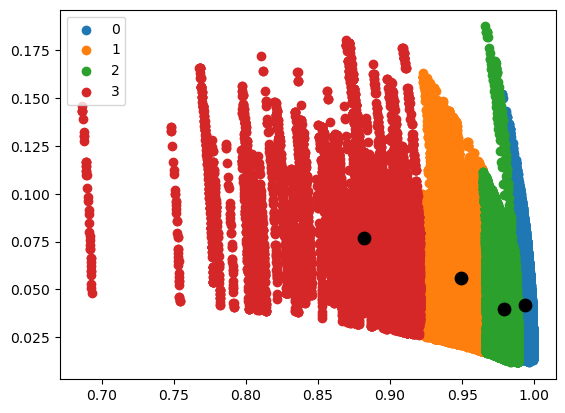

In [157]:
Kmeans_cluster(df_normalized, 4)

In [158]:
def cluster_columns(df, x):
    km = KMeans(n_clusters=x)
    km.fit(df)
    label = km.fit_predict(df)
    centroids=km.cluster_centers_
    u_labels = np.unique(label)
    df_normalized['Clusters'] =label
    return(df_normalized)

In [159]:
cluster_columns(df_normalized, 4)

flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998823  0.002072           0.041705  0.024171   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
0      0.006129     0.0  0.000681   0.0      0.000000            0.0   
1      0.006768     0.0  0.000752   0.0      0.000000            0.0   
2      0.005866     0.0  0.000587   0.0      0.000587            0.0   
3      0.006433     0.0  0.000643   0.0      0.000000            0.0   
4      0.010995     0.0  0.001000   0.0      0.001000            0.0   
...         ...     ...       ...   ...           ...            ...   
81100  0.007352     0.0  0.001050   0.0      0.000000            0.0   
81101  0.004834     0.0  0.000691   0.0      0.000000            0.0   
81102  0.009123     0.0  0.001303   0.0      0.000000            0.0   
81103  0.007718     0.0  0.001103   0.0      0.000000            0.0   
81104  0.028877     0.0  0.003209   0.0      0.000000            0.0   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
0               0.000000            0.000000    0.000000     0.000681   
1               0.000000            0.000752    0.000000     0.000000   
2               0.000000            0.000000    0.000000     0.000000   
3               0.000000            0.000000    0.000000     0.000000   
4               0.000000            0.000000    0.000000     0.000000   
...                  ...                 ...         ...          ...   
81100           0.000000            0.001050    0.000000     0.000000   
81101           0.000691            0.000000    0.000000     0.000000   
81102           0.000000            0.001303    0.000000     0.000000   
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  Clusters  
0                 0.000000       0.000000             0.0         2  
1                 0.000000       0.000000             0.0         2  
2                 0.000000       0.000000             0.0         2  
3                 0.000000       0.000643             0.0         2  
4                 0.000000       0.000000             0.0         0  
...                    ...            ...             ...       ...  
81100             0.000000       0.000000             0.0         1  
81101             0.000000       0.000000             0.0         1  
81102             0.000000       0.000000             0.0         0  
81103             0.000000       0.000000             0.0         0  
81104             0.003209       0.000000             0.0         0  

[81105 rows x 19 columns]

## Recomandation based on the Kmeans clusters

In [160]:
df_normalized= df_normalized.join(destinations_df)
df_normalized

flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998823  0.002072           0.041705  0.024171   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
0      0.006129     0.0  0.000681   0.0      0.000000            0.0   
1      0.006768     0.0  0.000752   0.0      0.000000            0.0   
2      0.005866     0.0  0.000587   0.0      0.000587            0.0   
3      0.006433     0.0  0.000643   0.0      0.000000            0.0   
4      0.010995     0.0  0.001000   0.0      0.001000            0.0   
...         ...     ...       ...   ...           ...            ...   
81100  0.007352     0.0  0.001050   0.0      0.000000            0.0   
81101  0.004834     0.0  0.000691   0.0      0.000000            0.0   
81102  0.009123     0.0  0.001303   0.0      0.000000            0.0   
81103  0.007718     0.0  0.001103   0.0      0.000000            0.0   
81104  0.028877     0.0  0.003209   0.0      0.000000            0.0   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
0               0.000000            0.000000    0.000000     0.000681   
1               0.000000            0.000752    0.000000     0.000000   
2               0.000000            0.000000    0.000000     0.000000   
3               0.000000            0.000000    0.000000     0.000000   
4               0.000000            0.000000    0.000000     0.000000   
...                  ...                 ...         ...          ...   
81100           0.000000            0.001050    0.000000     0.000000   
81101           0.000691            0.000000    0.000000     0.000000   
81102           0.000000            0.001303    0.000000     0.000000   
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  Clusters  \
0                 0.000000       0.000000             0.0         2   
1                 0.000000       0.000000             0.0         2   
2                 0.000000       0.000000             0.0         2   
3                 0.000000       0.000643             0.0         2   
4                 0.000000       0.000000             0.0         0   
...                    ...            ...             ...       ...   
81100             0.000000       0.000000             0.0         1   
81101             0.000000       0.000000             0.0         1   
81102             0.000000       0.000000             0.0         0   
81103             0.000000       0.000000             0.0         0   
81104             0.003209       0.000000             0.0         0   

                       to  
0      Florianopolis (SC)  
1             Recife (PE)  
2           Salvador (BH)  
3            Aracaju (SE)  
4           Salvador (BH)  
...                   ...  
81100   Campo Grande (MS)  
81101  Florianopolis (SC)  
81102          Natal (RN)  
81103  Florianopolis (SC)  
81104                 NaN  

[81105 rows x 20 columns]

In [161]:
# scaled_df['flight_code']= df_encoder['flight_code']
# scaled_df
cluster_number = df_normalized['Clusters'].loc[len(df_normalized)-1]
# cluster_number
df_appropriate = df_normalized[df_normalized['Clusters'].isin([cluster_number])]
df_appropriate

flightType  price_flight      days  price_hotel_x_day       age  \
4        0.000000      0.964418  0.002999           0.263297  0.020991   
5        0.000000      0.950799  0.003514           0.308538  0.024598   
7        0.002170      0.957915  0.004340           0.285803  0.022785   
19       0.002279      0.953565  0.004558           0.300133  0.023928   
24       0.000000      0.963992  0.001006           0.265016  0.021128   
...           ...           ...       ...                ...       ...   
81094    0.002174      0.962318  0.003261           0.269141  0.038042   
81096    0.002347      0.955932  0.001174           0.290600  0.041075   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
4      0.010995     0.0  0.001000   0.0         0.001       0.000000   
5      0.012885     0.0  0.001171   0.0         0.000       0.000000   
7      0.013020     0.0  0.001085   0.0         0.000       0.000000   
19     0.005697     0.0  0.001139   0.0         0.000       0.000000   
24     0.006037     0.0  0.001006   0.0         0.000       0.001006   
...         ...     ...       ...   ...           ...            ...   
81094  0.006521     0.0  0.001087   0.0         0.000       0.000000   
81096  0.007041     0.0  0.001174   0.0         0.000       0.000000   
81102  0.009123     0.0  0.001303   0.0         0.000       0.000000   
81103  0.007718     0.0  0.001103   0.0         0.000       0.000000   
81104  0.028877     0.0  0.003209   0.0         0.000       0.000000   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
4                    0.0            0.000000    0.000000          0.0   
5                    0.0            0.000000    0.000000          0.0   
7                    0.0            0.000000    0.000000          0.0   
19                   0.0            0.000000    0.000000          0.0   
24                   0.0            0.000000    0.000000          0.0   
...                  ...                 ...         ...          ...   
81094                0.0            0.001087    0.000000          0.0   
81096                0.0            0.001174    0.000000          0.0   
81102                0.0            0.001303    0.000000          0.0   
81103                0.0            0.000000    0.001103          0.0   
81104                0.0            0.000000    0.000000          0.0   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  Clusters  \
4                 0.000000       0.000000             0.0         0   
5                 0.000000       0.001171             0.0         0   
7                 0.000000       0.001085             0.0         0   
19                0.000000       0.001139             0.0         0   
24                0.000000       0.000000             0.0         0   
...                    ...            ...             ...       ...   
81094             0.000000       0.000000             0.0         0   
81096             0.000000       0.000000             0.0         0   
81102             0.000000       0.000000             0.0         0   
81103             0.000000       0.000000             0.0         0   
81104             0.003209       0.000000             0.0         0   

                       to  
4           Salvador (BH)  
5            Aracaju (SE)  
7           Brasilia (DF)  
19          Brasilia (DF)  
24          Salvador (BH)  
...                   ...  
81094       Brasilia (DF)  
81096       Brasilia (DF)  
81102          Natal (RN)  
81103  Florianopolis (SC)  
81104                 NaN  

[23958 rows x 20 columns]

In [162]:
# df_normalized['flightType'].value_counts()

In [163]:
# df_normalized= df_normalized.join(destinations_df)
# df_normalized

In [164]:
organized_destinations = df_appropriate['to'].value_counts()
organized_destinations

Florianopolis (SC)     4638
Brasilia (DF)          3913
Recife (PE)            3043
Campo Grande (MS)      2575
Sao Paulo (SP)         2336
Natal (RN)             2192
Aracaju (SE)           2118
Rio de Janeiro (RJ)    1667
Salvador (BH)          1475
Name: to, dtype: int64

In [67]:
df = pd.DataFrame(organized_destinations)


In [68]:
type(organized_destinations)

pandas.core.series.Series

In [69]:
for val, cnt in organized_destinations.iteritems():
    print (val, 'was choosen', cnt, 'times')

Florianopolis (SC) was choosen 4648 times
Brasilia (DF) was choosen 3942 times
Recife (PE) was choosen 3052 times
Campo Grande (MS) was choosen 2573 times
Sao Paulo (SP) was choosen 2352 times
Natal (RN) was choosen 2198 times
Aracaju (SE) was choosen 2123 times
Rio de Janeiro (RJ) was choosen 1673 times
Salvador (BH) was choosen 1475 times


# Affinity propagation method

In [ ]:
# af = AffinityPropagation(preference =-50).fit(df_appropriate)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_
  
# n_clusters_ = len(cluster_centers_indices)

In [ ]:
# import matplotlib.pyplot as plt
# from itertools import cycle
  
# plt.close('all')
# plt.figure(1)
# plt.clf()
  
# colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
# for k, col in zip(range(n_clusters_), colors):
#     class_members = labels == k
#     cluster_center = X[cluster_centers_indices[k]]
#     plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
#     plt.plot(cluster_center[0], cluster_center[1], 'o',
#              markerfacecolor = col, markeredgecolor ='k',
#              markersize = 14)
  
#     for x in X[class_members]:
#         plt.plot([cluster_center[0], x[0]], 
#                  [cluster_center[1], x[1]], col)
  
# plt.title('Estimated number of clusters: % d' % n_clusters_)
# plt.show()

# Determine the right number of cluster to use in the Kmean

In [70]:
df_visualization= df_visualization.drop(['Clusters'], axis= 1)
df_visualization

flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998823  0.002072           0.041705  0.024171   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
0      0.006129     0.0  0.000681   0.0      0.000000            0.0   
1      0.006768     0.0  0.000752   0.0      0.000000            0.0   
2      0.005866     0.0  0.000587   0.0      0.000587            0.0   
3      0.006433     0.0  0.000643   0.0      0.000000            0.0   
4      0.010995     0.0  0.001000   0.0      0.001000            0.0   
...         ...     ...       ...   ...           ...            ...   
81100  0.007352     0.0  0.001050   0.0      0.000000            0.0   
81101  0.004834     0.0  0.000691   0.0      0.000000            0.0   
81102  0.009123     0.0  0.001303   0.0      0.000000            0.0   
81103  0.007718     0.0  0.001103   0.0      0.000000            0.0   
81104  0.028877     0.0  0.003209   0.0      0.000000            0.0   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
0               0.000000            0.000000    0.000000     0.000681   
1               0.000000            0.000752    0.000000     0.000000   
2               0.000000            0.000000    0.000000     0.000000   
3               0.000000            0.000000    0.000000     0.000000   
4               0.000000            0.000000    0.000000     0.000000   
...                  ...                 ...         ...          ...   
81100           0.000000            0.001050    0.000000     0.000000   
81101           0.000691            0.000000    0.000000     0.000000   
81102           0.000000            0.001303    0.000000     0.000000   
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  
0                 0.000000       0.000000             0.0  
1                 0.000000       0.000000             0.0  
2                 0.000000       0.000000             0.0  
3                 0.000000       0.000643             0.0  
4                 0.000000       0.000000             0.0  
...                    ...            ...             ...  
81100             0.000000       0.000000             0.0  
81101             0.000000       0.000000             0.0  
81102             0.000000       0.000000             0.0  
81103             0.000000       0.000000             0.0  
81104             0.003209       0.000000             0.0  

[81105 rows x 18 columns]

In [71]:
def number_clusters(df, x, y):
  inertias = []
  # silhouettes =[]
  ks= [i for i in range(x, y+1)]
  for i in ks:
      km = KMeans(n_clusters=i)
      #km = KMeans(n_clusters=5)
      km.fit(df[df.columns[:18]])
      clusters = km.fit_predict(df[df.columns[:18]])
      inertias.append(km.inertia_)
      # silhouettes.append(silhouette_score(df, clusters))
  return(plt.plot(ks, inertias))

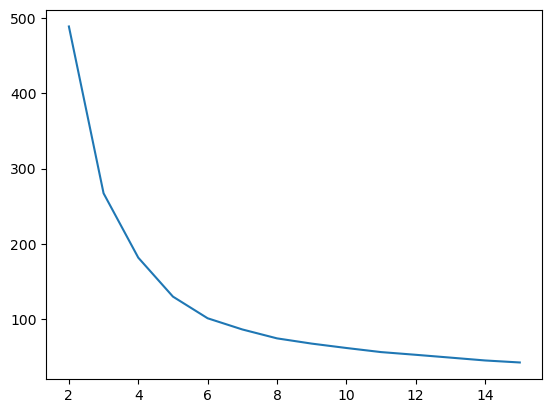

In [72]:
number_clusters(df_visualization, 2, 15)

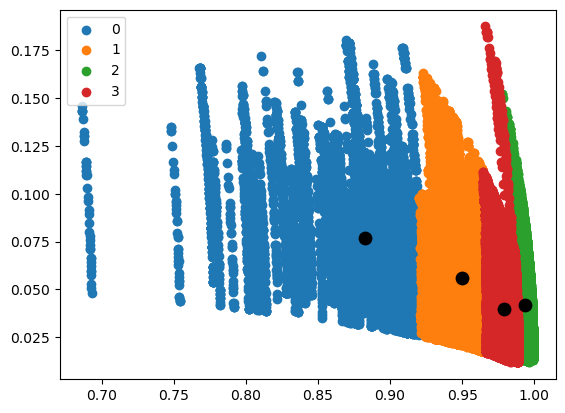

In [73]:
Kmeans_cluster(df_visualization, 4)

In [126]:
def silhouette(df, x, y):
  silhouettes =[]
  ks= [i for i in range(x, y+1)]
  for i in ks:
      km = KMeans(n_clusters=i)
      #km = KMeans(n_clusters=5)
      km.fit(df[df.columns[:18]])
      clusters = km.fit_predict(df[df.columns[:18]])
      silhouettes.append(silhouette_score(df, clusters))
  return(plt.plot(ks, silhouettes, color='k', marker='*'))

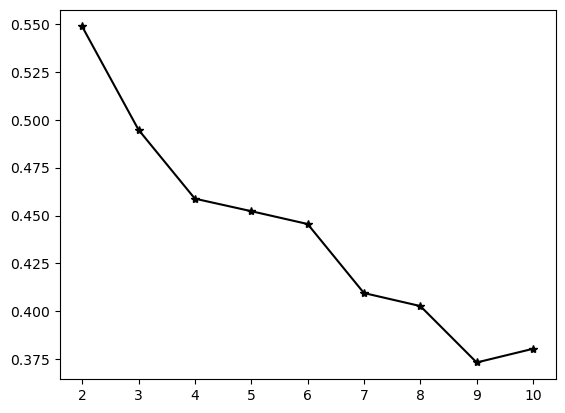

In [127]:
silhouette(df_visualization, 2, 10)

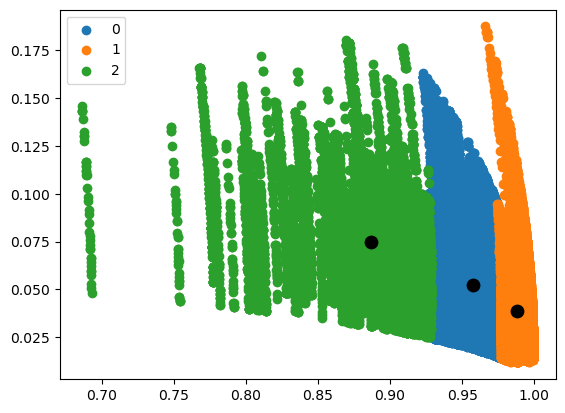

In [128]:
Kmeans_cluster(df_visualization, 3)

# PCA

In [74]:
# california_housing =fetch_california_housing(as_frame=True)

# d = preprocessing.normalize(df_visualization)
# scaled_df = pd.DataFrame(d, columns=df_visualization.columns)
# scaled_df
df_visualization

flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998823  0.002072           0.041705  0.024171   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
0      0.006129     0.0  0.000681   0.0      0.000000            0.0   
1      0.006768     0.0  0.000752   0.0      0.000000            0.0   
2      0.005866     0.0  0.000587   0.0      0.000587            0.0   
3      0.006433     0.0  0.000643   0.0      0.000000            0.0   
4      0.010995     0.0  0.001000   0.0      0.001000            0.0   
...         ...     ...       ...   ...           ...            ...   
81100  0.007352     0.0  0.001050   0.0      0.000000            0.0   
81101  0.004834     0.0  0.000691   0.0      0.000000            0.0   
81102  0.009123     0.0  0.001303   0.0      0.000000            0.0   
81103  0.007718     0.0  0.001103   0.0      0.000000            0.0   
81104  0.028877     0.0  0.003209   0.0      0.000000            0.0   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
0               0.000000            0.000000    0.000000     0.000681   
1               0.000000            0.000752    0.000000     0.000000   
2               0.000000            0.000000    0.000000     0.000000   
3               0.000000            0.000000    0.000000     0.000000   
4               0.000000            0.000000    0.000000     0.000000   
...                  ...                 ...         ...          ...   
81100           0.000000            0.001050    0.000000     0.000000   
81101           0.000691            0.000000    0.000000     0.000000   
81102           0.000000            0.001303    0.000000     0.000000   
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  
0                 0.000000       0.000000             0.0  
1                 0.000000       0.000000             0.0  
2                 0.000000       0.000000             0.0  
3                 0.000000       0.000643             0.0  
4                 0.000000       0.000000             0.0  
...                    ...            ...             ...  
81100             0.000000       0.000000             0.0  
81101             0.000000       0.000000             0.0  
81102             0.000000       0.000000             0.0  
81103             0.000000       0.000000             0.0  
81104             0.003209       0.000000             0.0  

[81105 rows x 18 columns]

In [75]:
df_normalized

flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998823  0.002072           0.041705  0.024171   
81102    0.000000      0.947421  0.005213           0.316541  0.045615   
81103    0.000000      0.962658  0.004410           0.267803  0.038591   
81104    0.000000      0.962582  0.016043           0.256689  0.080215   

          month  female      male  none  Aracaju (SE)  Brasilia (DF)  \
0      0.006129     0.0  0.000681   0.0      0.000000            0.0   
1      0.006768     0.0  0.000752   0.0      0.000000            0.0   
2      0.005866     0.0  0.000587   0.0      0.000587            0.0   
3      0.006433     0.0  0.000643   0.0      0.000000            0.0   
4      0.010995     0.0  0.001000   0.0      0.001000            0.0   
...         ...     ...       ...   ...           ...            ...   
81100  0.007352     0.0  0.001050   0.0      0.000000            0.0   
81101  0.004834     0.0  0.000691   0.0      0.000000            0.0   
81102  0.009123     0.0  0.001303   0.0      0.000000            0.0   
81103  0.007718     0.0  0.001103   0.0      0.000000            0.0   
81104  0.028877     0.0  0.003209   0.0      0.000000            0.0   

       Campo Grande (MS)  Florianopolis (SC)  Natal (RN)  Recife (PE)  \
0               0.000000            0.000000    0.000000     0.000681   
1               0.000000            0.000752    0.000000     0.000000   
2               0.000000            0.000000    0.000000     0.000000   
3               0.000000            0.000000    0.000000     0.000000   
4               0.000000            0.000000    0.000000     0.000000   
...                  ...                 ...         ...          ...   
81100           0.000000            0.001050    0.000000     0.000000   
81101           0.000691            0.000000    0.000000     0.000000   
81102           0.000000            0.001303    0.000000     0.000000   
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  Clusters  \
0                 0.000000       0.000000             0.0         3   
1                 0.000000       0.000000             0.0         3   
2                 0.000000       0.000000             0.0         3   
3                 0.000000       0.000643             0.0         3   
4                 0.000000       0.000000             0.0         0   
...                    ...            ...             ...       ...   
81100             0.000000       0.000000             0.0         1   
81101             0.000000       0.000000             0.0         1   
81102             0.000000       0.000000             0.0         0   
81103             0.000000       0.000000             0.0         0   
81104             0.003209       0.000000             0.0         0   

                       to  
0      Florianopolis (SC)  
1             Recife (PE)  
2           Salvador (BH)  
3            Aracaju (SE)  
4           Salvador (BH)  
...                   ...  
81100   Campo Grande (MS)  
81101  Florianopolis (SC)  
81102          Natal (RN)  
81103  Florianopolis (SC)  
81104                 NaN  

[81105 rows x 20 columns]

In [76]:

pca = PCA(n_components = 2)
pca_visualization = pca.fit_transform(df_visualization)

principalDf = pd.DataFrame(data = pca_visualization
             , columns = ['principal component 1', 'principal component 2'])

In [77]:
# df_normalized['to'].unique()

In [78]:
finalDf = pd.concat([principalDf, df_normalized[['to']]], axis = 1)

In [79]:
pca = PCA(n_components=2)
pca.fit(df_visualization)
df_pca = pca.transform(df_visualization)
print("original shape:   ", df_visualization.shape)
print("transformed shape:", df_pca.shape)

original shape:    (81105, 18)
transformed shape: (81105, 2)


In [80]:
PCA(df_visualization)

PCA(n_components=       flightType  price_flight      days  price_hotel_x_day       age  \
0        0.000681      0.976884  0.002724           0.213182  0.014302   
1        0.000752      0.971747  0.003008           0.235378  0.015791   
2        0.000587      0.987894  0.001173           0.154521  0.012319   
3        0.000643      0.985425  0.001287           0.169442  0.013508   
4        0.000000      0.964418  0.002999           0.263297  0.020991   
...           ...           ...       ...                ...       ...   
81100    0.001050      0.997276  0.003151           0.063423  0.036758   
81101    0.000691      0.998...
81103           0.000000            0.000000    0.001103     0.000000   
81104           0.000000            0.000000    0.000000     0.000000   

       Rio de Janeiro (RJ)  Salvador (BH)  Sao Paulo (SP)  
0                 0.000000       0.000000             0.0  
1                 0.000000       0.000000             0.0  
2                 0.000000      

In [81]:
le = preprocessing.LabelEncoder()
destinations= le.fit_transform(finalDf['to'])
destinations

array([3, 5, 7, ..., 4, 3, 9])

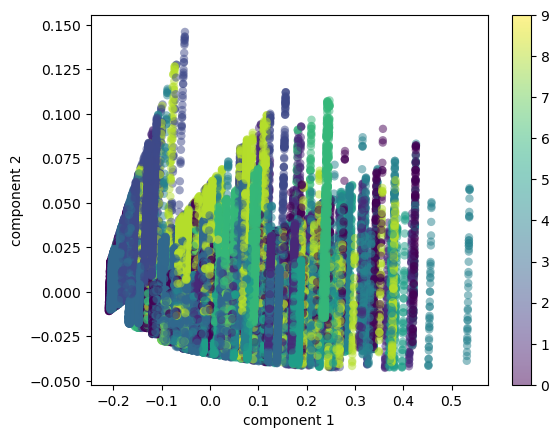

In [82]:
plt.scatter(df_pca[:, 0], df_pca[:, 1],
            c=destinations, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

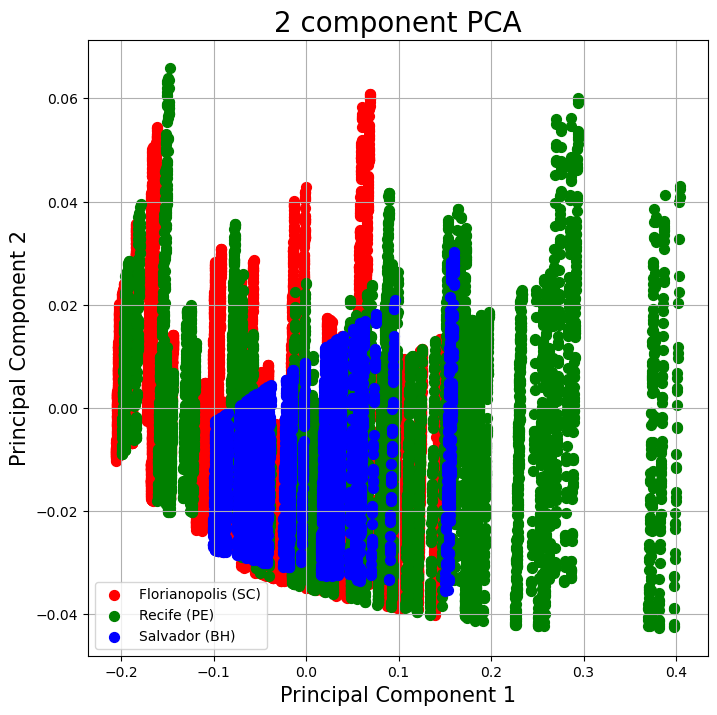

In [83]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Florianopolis (SC)', 'Recife (PE)', 'Salvador (BH)']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['to'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# t_SNE visualization model

In [149]:
def T_sne_one(df, x):
  df_tsne = TSNE(n_components=2, learning_rate= 'auto', 
              init='random', perplexity= x).fit_transform(df)

  df_visualization['tsne-2d-one'] = df_tsne[:,0]
  df_visualization['tsne-2d-two'] = df_tsne[:,1]

  plt.figure(figsize=(16,10))
  sns.scatterplot(
      x="tsne-2d-one", y="tsne-2d-two",
      hue= finalDf['to'],
      palette=sns.color_palette("hls", 9),
      data=df_visualization,
      legend="full",
      alpha=0.3
  )

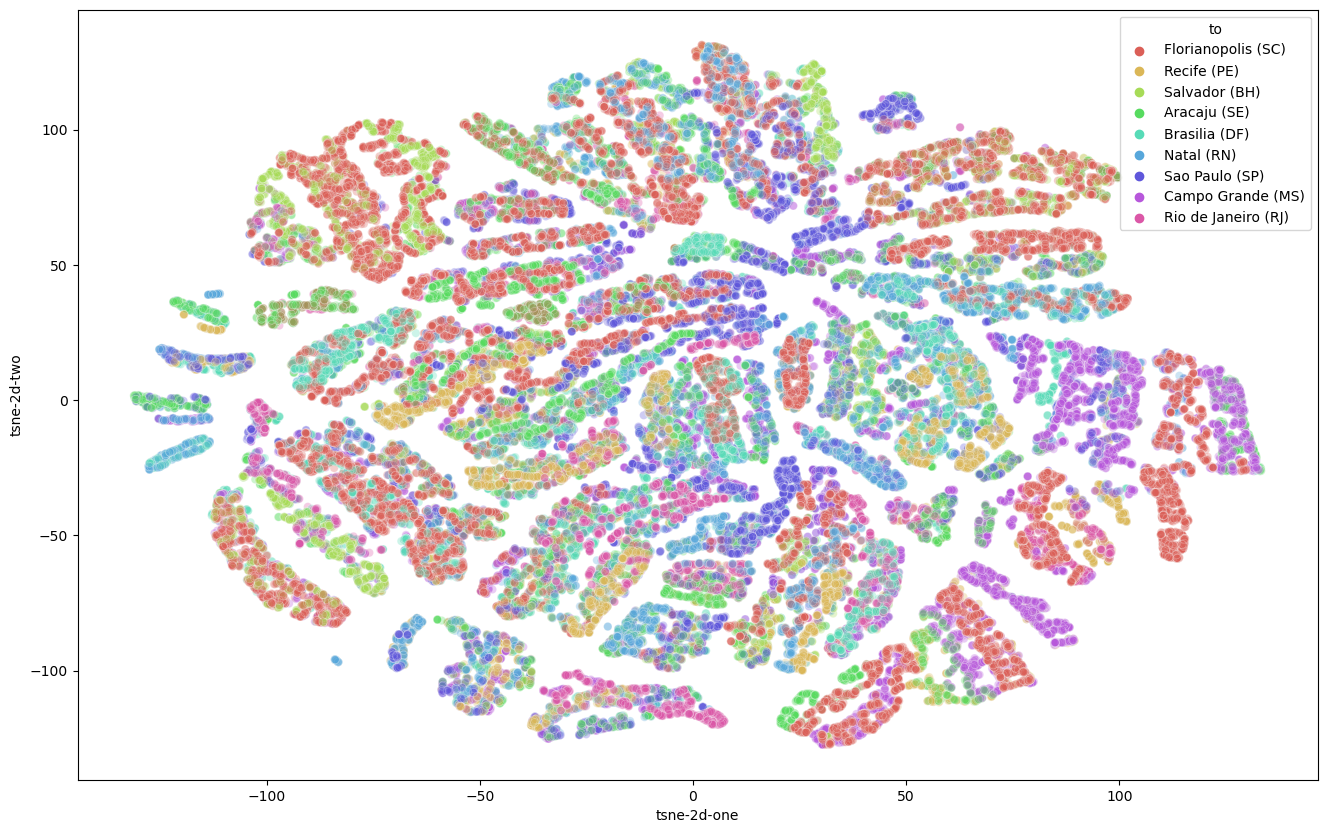

In [150]:
T_sne_one(df_visualization, 30)

In [86]:
def T_sne_one1(df, x):
  df_tsne = TSNE(n_components=2, learning_rate= 'auto', 
              init='random', perplexity= x).fit_transform(df)

  df_visualization['tsne-1d'] = df_tsne[:,0]
  df_visualization['tsne-2d'] = df_tsne[:,1]

  plt.figure(figsize=(16,10))
  sns.scatterplot(
      x="tsne-1d", y="tsne-2d",
      hue= finalDf['to'],
      palette=sns.color_palette("hls", 9),
      data=df_visualization,
      legend="full",
      alpha=0.3
  )

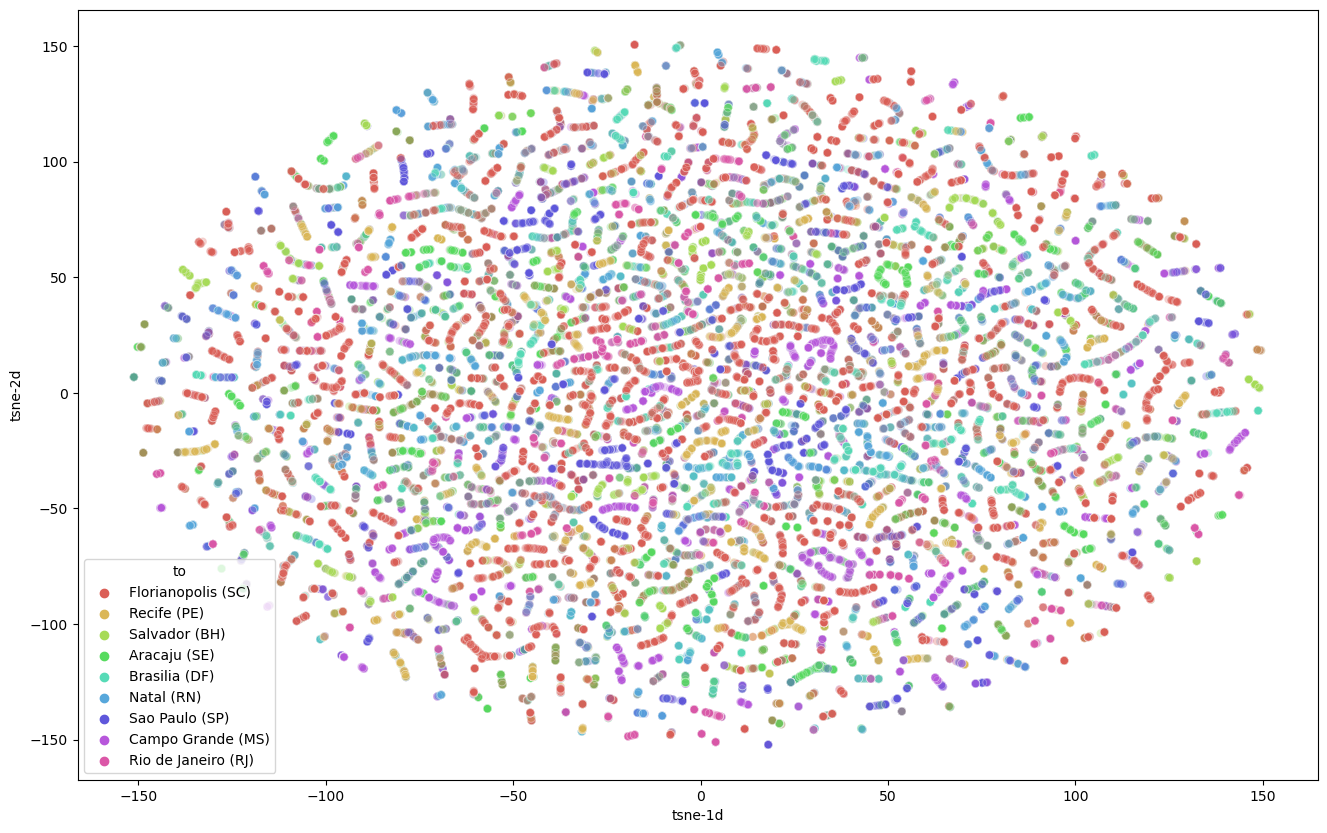

In [88]:
T_sne_one1(df_visualization, 29)

In [151]:

def T_sne_all(df):
  x =[5, 10, 25, 50]
  for i in x:
    df_tsne = TSNE(n_components=2, learning_rate= 'auto', 
               init='random', perplexity= i).fit_transform(df)
  
    df_visualization['tsne-2d-one'] = df_tsne[:,0]
    df_visualization['tsne-2d-two'] = df_tsne[:,1]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue= finalDf['to'],
        palette=sns.color_palette("hls", 9),
        data=df_visualization,
        legend="full",
        alpha=0.3
    )

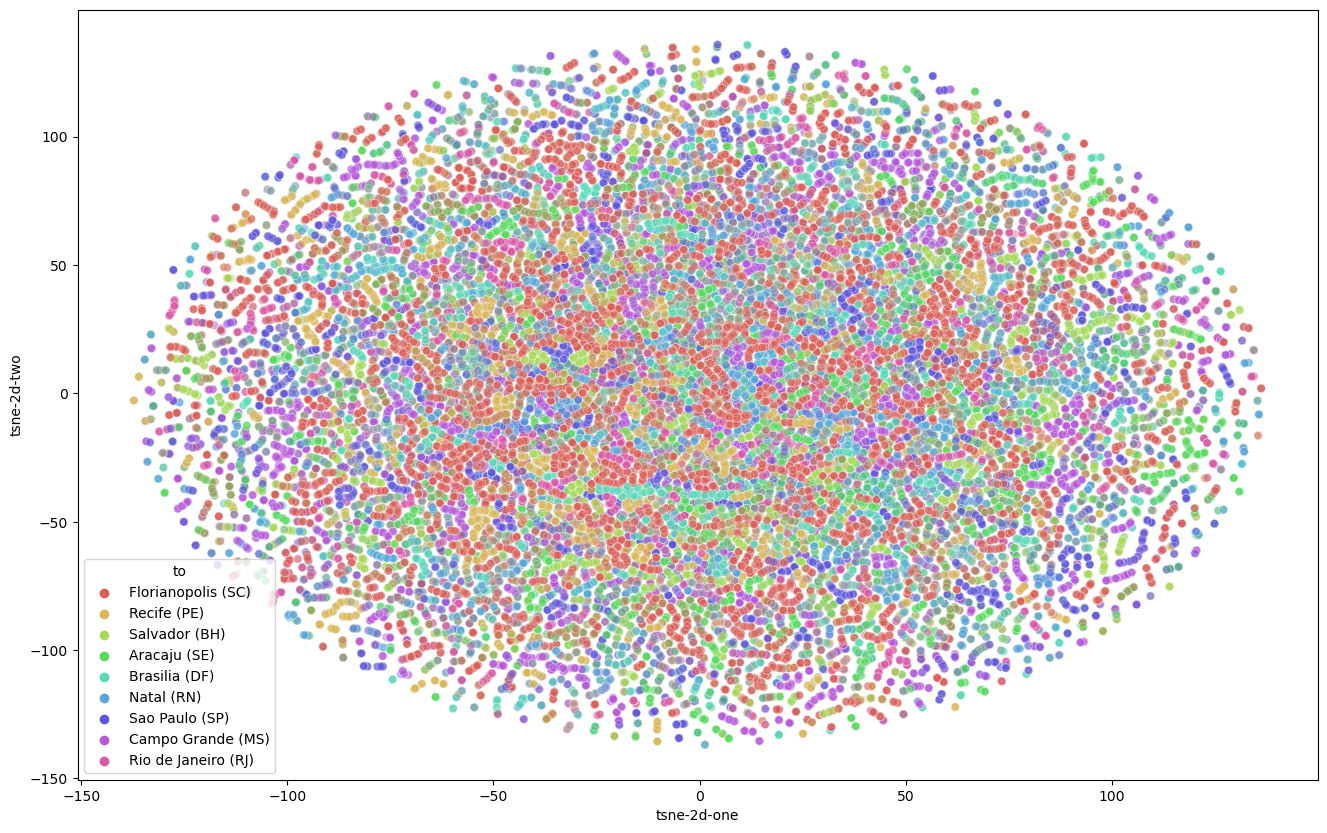

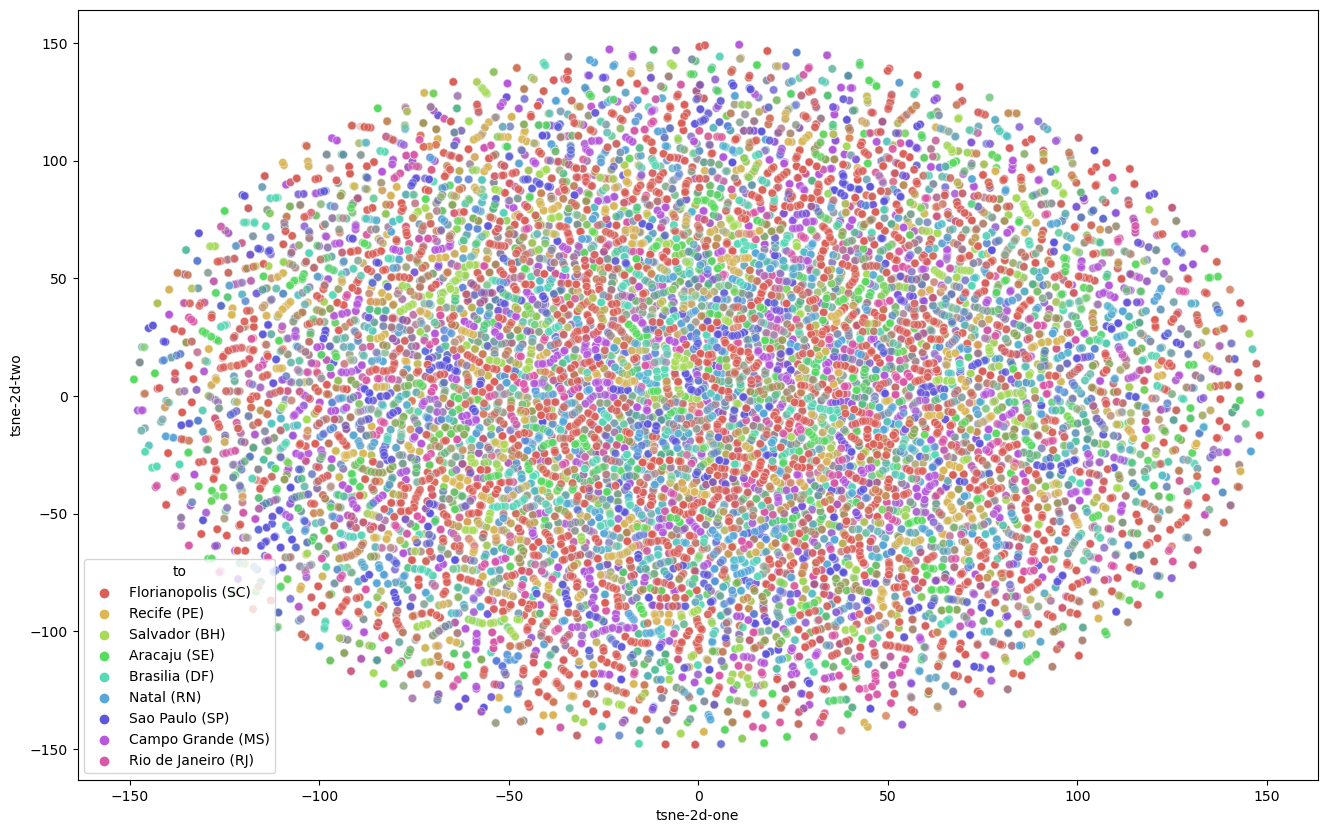

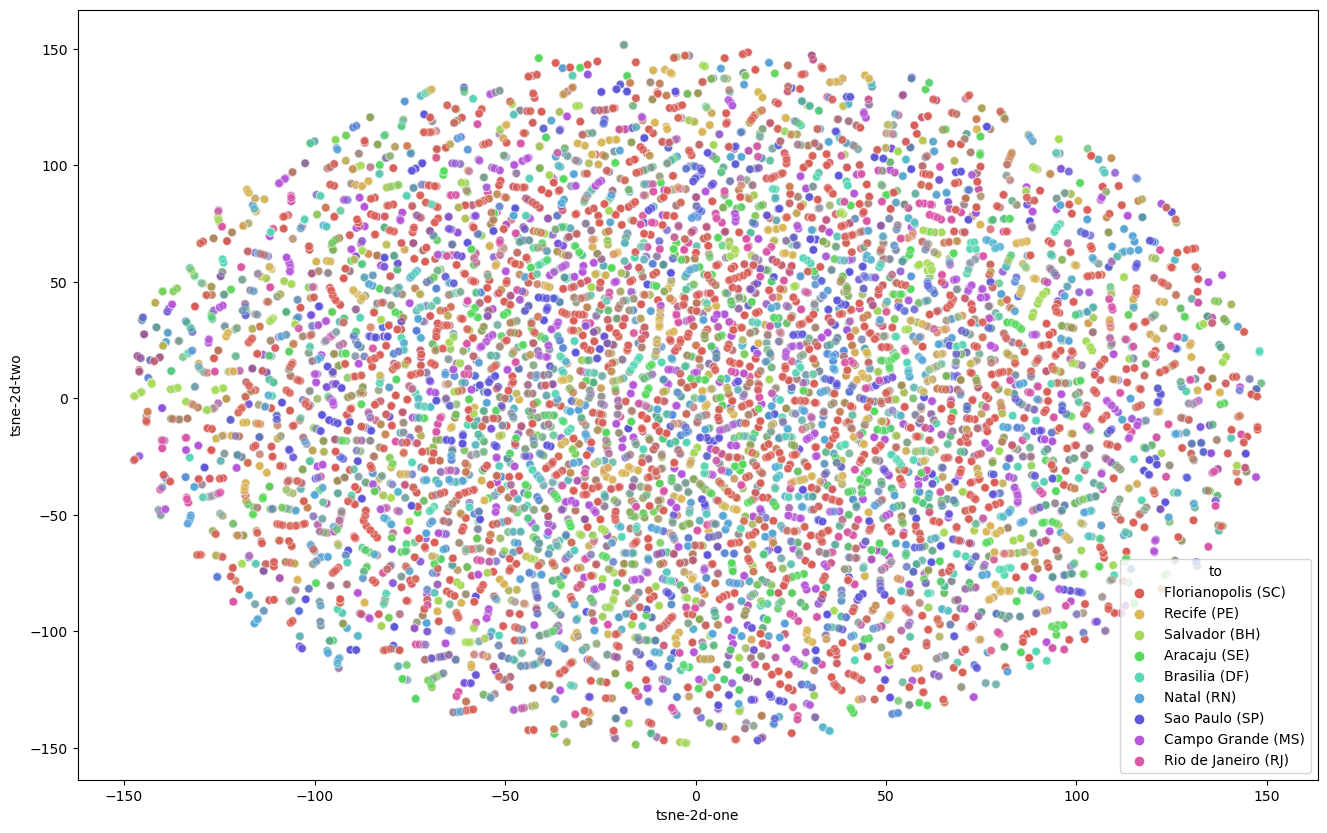

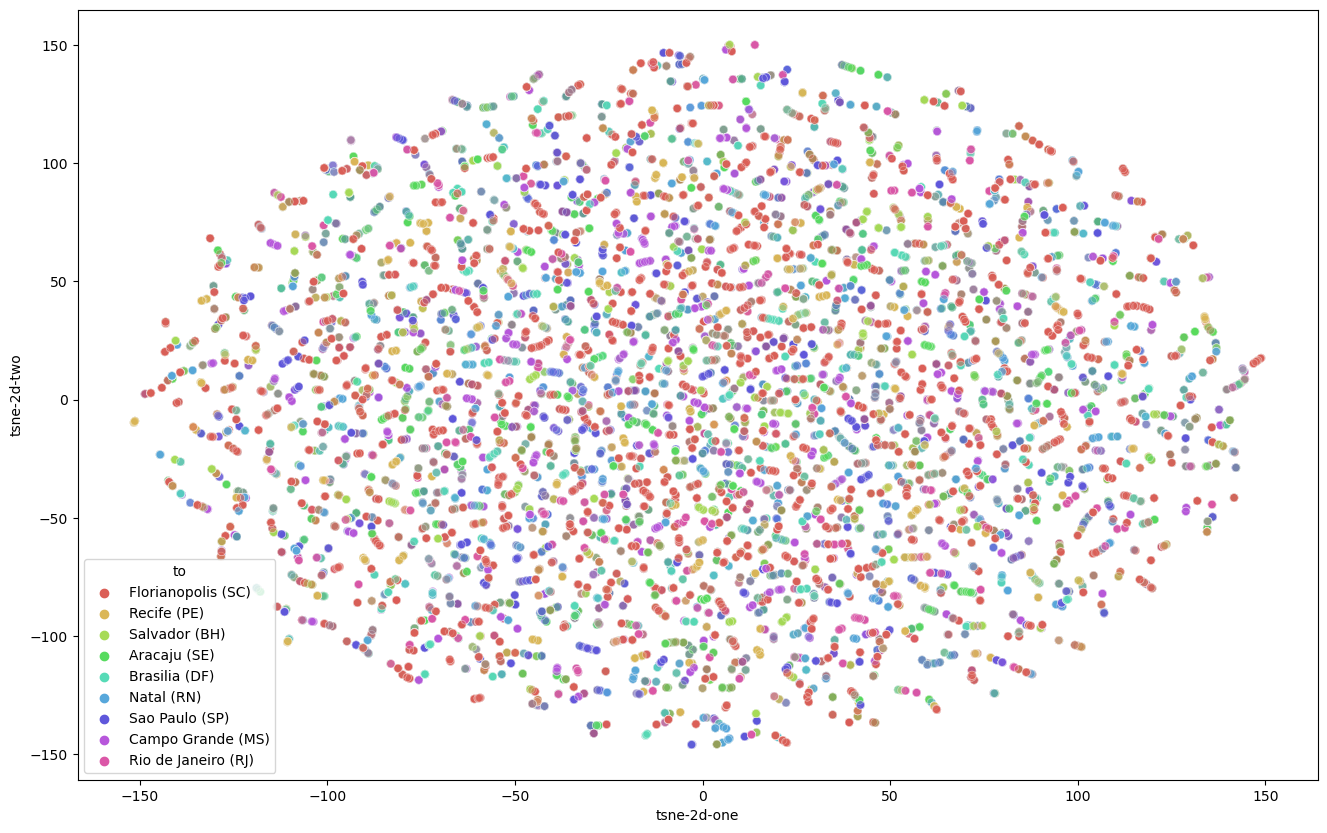

In [152]:
T_sne_all(df_visualization)